# Table of Contents
1. Splitting the Dataset into Training (for modelers) and Validation (for validators) sets, and further splitting the training set into subsets for training, validation, and testing
2. Data Import
3. Checking Basic Information about the Dataset
4. Analysis of Values and Dependencies in the Dataset
5. Conclusion

In [3]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

# 1. Splitting the Dataset

- Division into sets:
    - For modelers (70%) - X_modelling, y_modelling
    - For validators (30%) - X_validating, y_validating

- Splitting the modeler's dataset into:
    - Training set (70%) - X_train, y_train
    - Validation set (20%) - X_val, y_val
    - Test set (10%) - X_test, y_test

In [3]:
mobile_df = pd.read_csv('../Data/mobile.csv')
X = mobile_df.iloc[:, 0:-1]
y = mobile_df.iloc[:, -1]
X_modelling, X_validating, y_modelling, y_validating = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

print(X_modelling.shape)
print(y_modelling.shape)

print(X_validating.shape)
print(y_validating.shape)

(1400, 20)
(1400,)
(600, 20)
(600,)


Saving separate CSV files for modelers and validators

In [ ]:
modelling_df = pd.concat([X_modelling, y_modelling], axis=1)
modelling_df.to_csv('../../Data/Data_modelling/mobile_modelling.csv', index=False)

validating_df = pd.concat([X_validating, y_validating], axis=1)
validating_df.to_csv('../../Data/Data_validating/mobile_validating.csv', index=False)


Splitting the dataset for modelers into training, validation, and test sets

In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X_modelling, y_modelling, stratify=y_modelling, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(980, 20)
(980,)
(294, 20)
(294,)
(126, 20)
(126,)


# 2. Data Import

In [4]:
mobile_df = pd.read_csv('../Data/Data_modelling/mobile_modelling.csv')
mobile_df.head(10) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,807,1,0.5,1,0,0,37,0.2,127,4,0,245,829,2319,5,4,4,0,0,0,1
1,1065,1,0.5,0,0,1,14,0.7,89,2,2,188,928,3078,10,1,18,1,0,1,2
2,1171,1,1.7,1,2,0,19,0.3,167,7,19,248,755,263,6,5,8,0,0,0,0
3,609,1,3.0,0,15,1,44,0.3,117,1,16,58,1253,2581,15,11,15,1,0,1,1
4,1193,1,2.3,0,7,0,20,1.0,158,7,13,1442,1904,1958,7,5,2,1,0,0,2
5,1417,1,2.7,0,2,1,56,0.9,114,6,4,494,1649,590,11,3,6,1,0,1,0
6,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1,1
7,1742,1,1.6,0,3,0,49,0.8,100,1,9,1134,1469,1947,5,4,6,1,0,1,2
8,675,0,2.3,0,10,0,60,0.9,144,5,15,192,757,1735,7,0,13,1,0,1,0
9,642,1,0.5,0,0,1,38,0.8,86,5,10,887,1775,435,9,2,2,1,1,0,0


#### About dataset:
This dataset consists of 2000 records and 21 columns describing phones features.

**Columns descriptions:**
- *battery_power* - total energy a battery can store in one time measured in mAh
- *blue* - has bluetooth or not
- *clock_speed* - speed at which microprocessor executes instructions
- *dual_sim* - has dual sim support or not
- *fc* - front camera mega pixels
- *four_g* - has 4G or not
- *int_memory* - internal memory in gigabytes
- *m_dep* - mobile depth in cm
- *mobile_wt* - weight of mobile phone
- *n_cores* - number of cores of processor
- *pc* - primary camera mega pixels
- *px_height* - pixel resolution height
- *px_width* - pixel resolution width
- *ram* - Random Access Memory in megabytes
- *sc_h* - screen height of mobile in cm
- *sc_w*- screen width of mobile in cm
- *talk_time* - longest time that a single battery charge will last when you are talking
- *three_g* - has 3G or not
- *touch_screen* - has touch screen or not
- *wifi* - has wifi or not
- *price_range* - price range measured on a scale of 0 to 3

# 3. Checking Basic Information about the Dataset

In [5]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

Histograms depicting the distribution of individual variables.

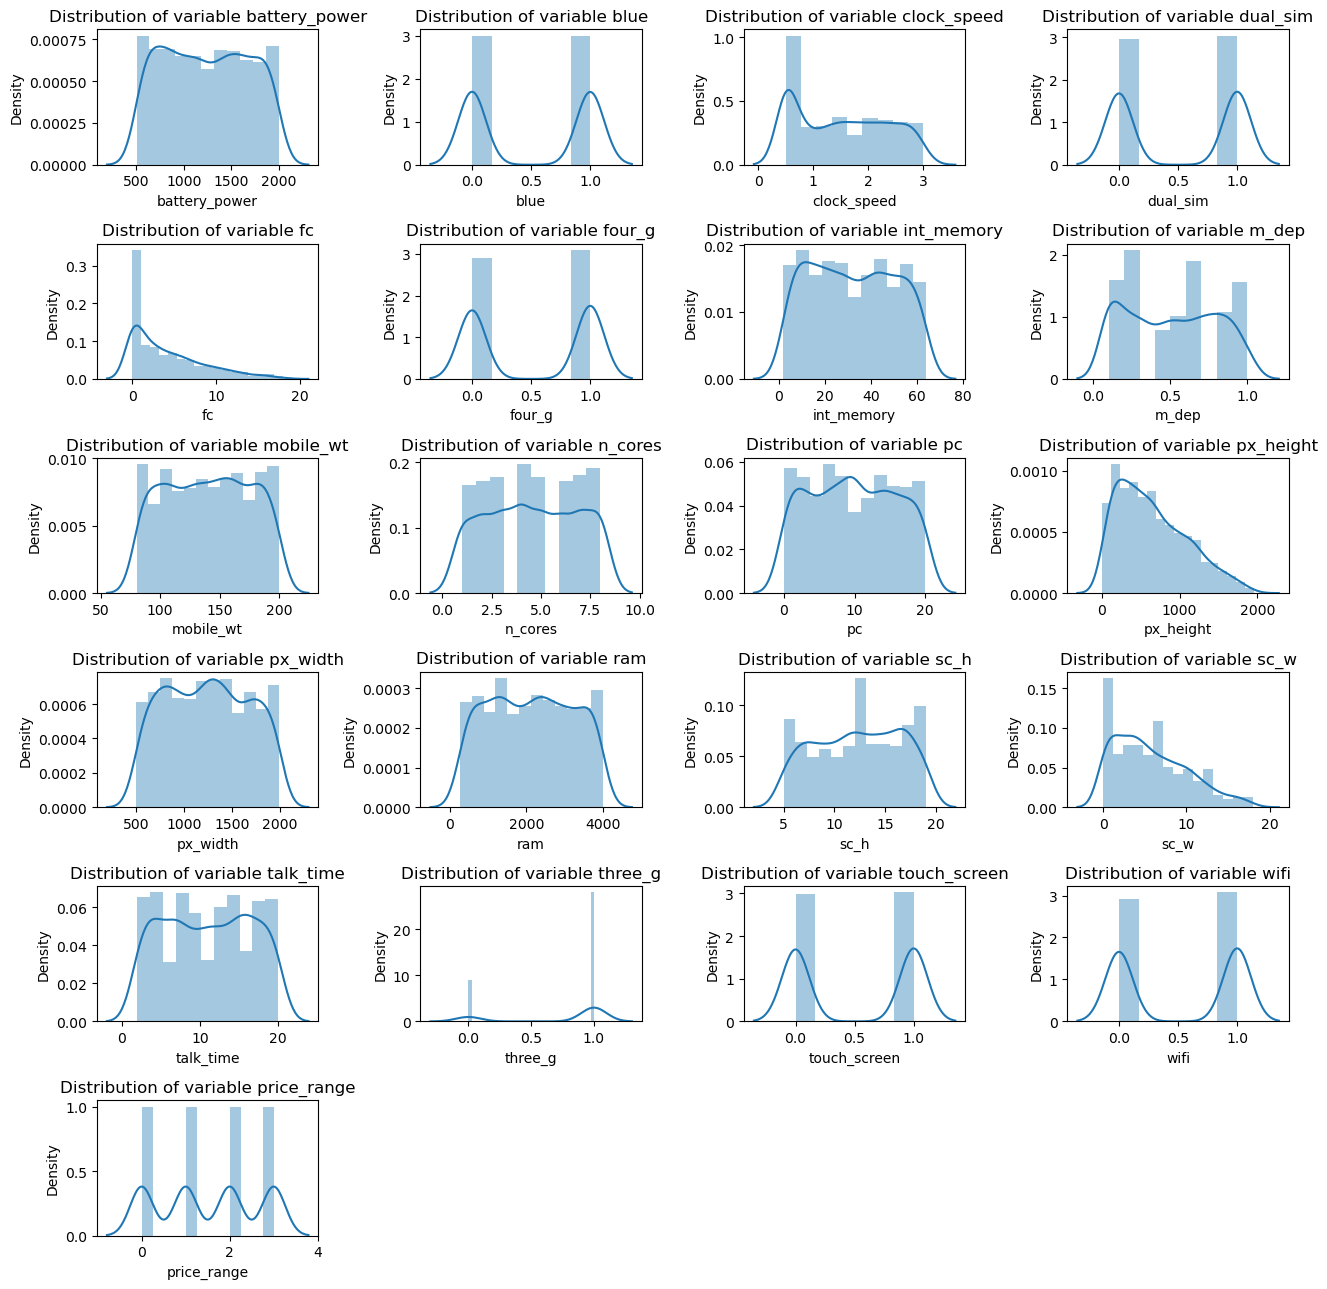

In [8]:
r = 6
c = 4

plt.figure(figsize=(13, 13))

for i, column in enumerate(mobile_df.columns):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(mobile_df[column])
    dis_dist.set_title(f'Distribution of variable {column}')  

plt.tight_layout() 
plt.show()

In [9]:
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.027143,0.499286,1.526071,0.505714,4.215000,0.515714,32.147143,0.505143,140.125714,4.564286,...,652.376429,1244.966429,2122.869286,12.294286,5.787143,10.972143,0.756429,0.503571,0.512143,1.500000
std,440.555073,0.500178,0.824300,0.500146,4.251417,0.499932,18.209559,0.290107,35.361221,2.279946,...,447.273563,428.168423,1087.155644,4.160191,4.376048,5.546213,0.429390,0.500166,0.500031,1.118434
min,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,842.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,874.000000,1205.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1222.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,141.000000,5.000000,...,576.000000,1247.000000,2127.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,958.500000,1613.000000,3049.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Analyzing non-binary variables where there are many records with a value of 0

In [10]:
mobile_df.agg(['min', 'max'])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
min,502,0,0.5,0,0,0,2,0.1,80,1,0,0,500,256,5,0,2,0,0,0,0
max,1998,1,3.0,1,18,1,64,1.0,200,8,20,1960,1998,3998,19,18,20,1,1,1,3


In [5]:
print("front camera with value of 0:")
print((mobile_df['fc'] == 0).sum())

print("primary camera with value of 0:")
print((mobile_df['pc'] == 0).sum())

print("px_height with value of 0:")
print((mobile_df['px_height'] == 0).sum())

print("sc_w with value of 0:")
print((mobile_df['sc_w'] == 0).sum())

front camera with value of 0:
330
primary camera with value of 0:
73
px_height with value of 0:
1
sc_w with value of 0:
124


We have 330 phones without a front camera and 73 without a main camera. 

Additionally, an important observation is that we have 1 phone with px_height equal to 0 and 124 phones with sc_w equal to 0, while respectively px_width and sc_h are not equal to 0, so these might be data errors. We will remove these rows.

In [6]:
mobile_df = mobile_df[(mobile_df['px_height'] != 0) & (mobile_df['sc_w'] != 0)]
print(mobile_df.shape)

(1275, 21)


# 4. Analysis of values and dependencies in the dataset

### Continuous variables

Distribution of values in different columns depending on the price range. Analysing every single column in groups depending on values range, as to provide clear plots. This way we can analyse how different columns change within the given price range.

In [8]:
columns_binary = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
all_columns = mobile_df.columns

selected_columns = [col for col in all_columns if col not in columns_binary]
non_binary_df = mobile_df[selected_columns]

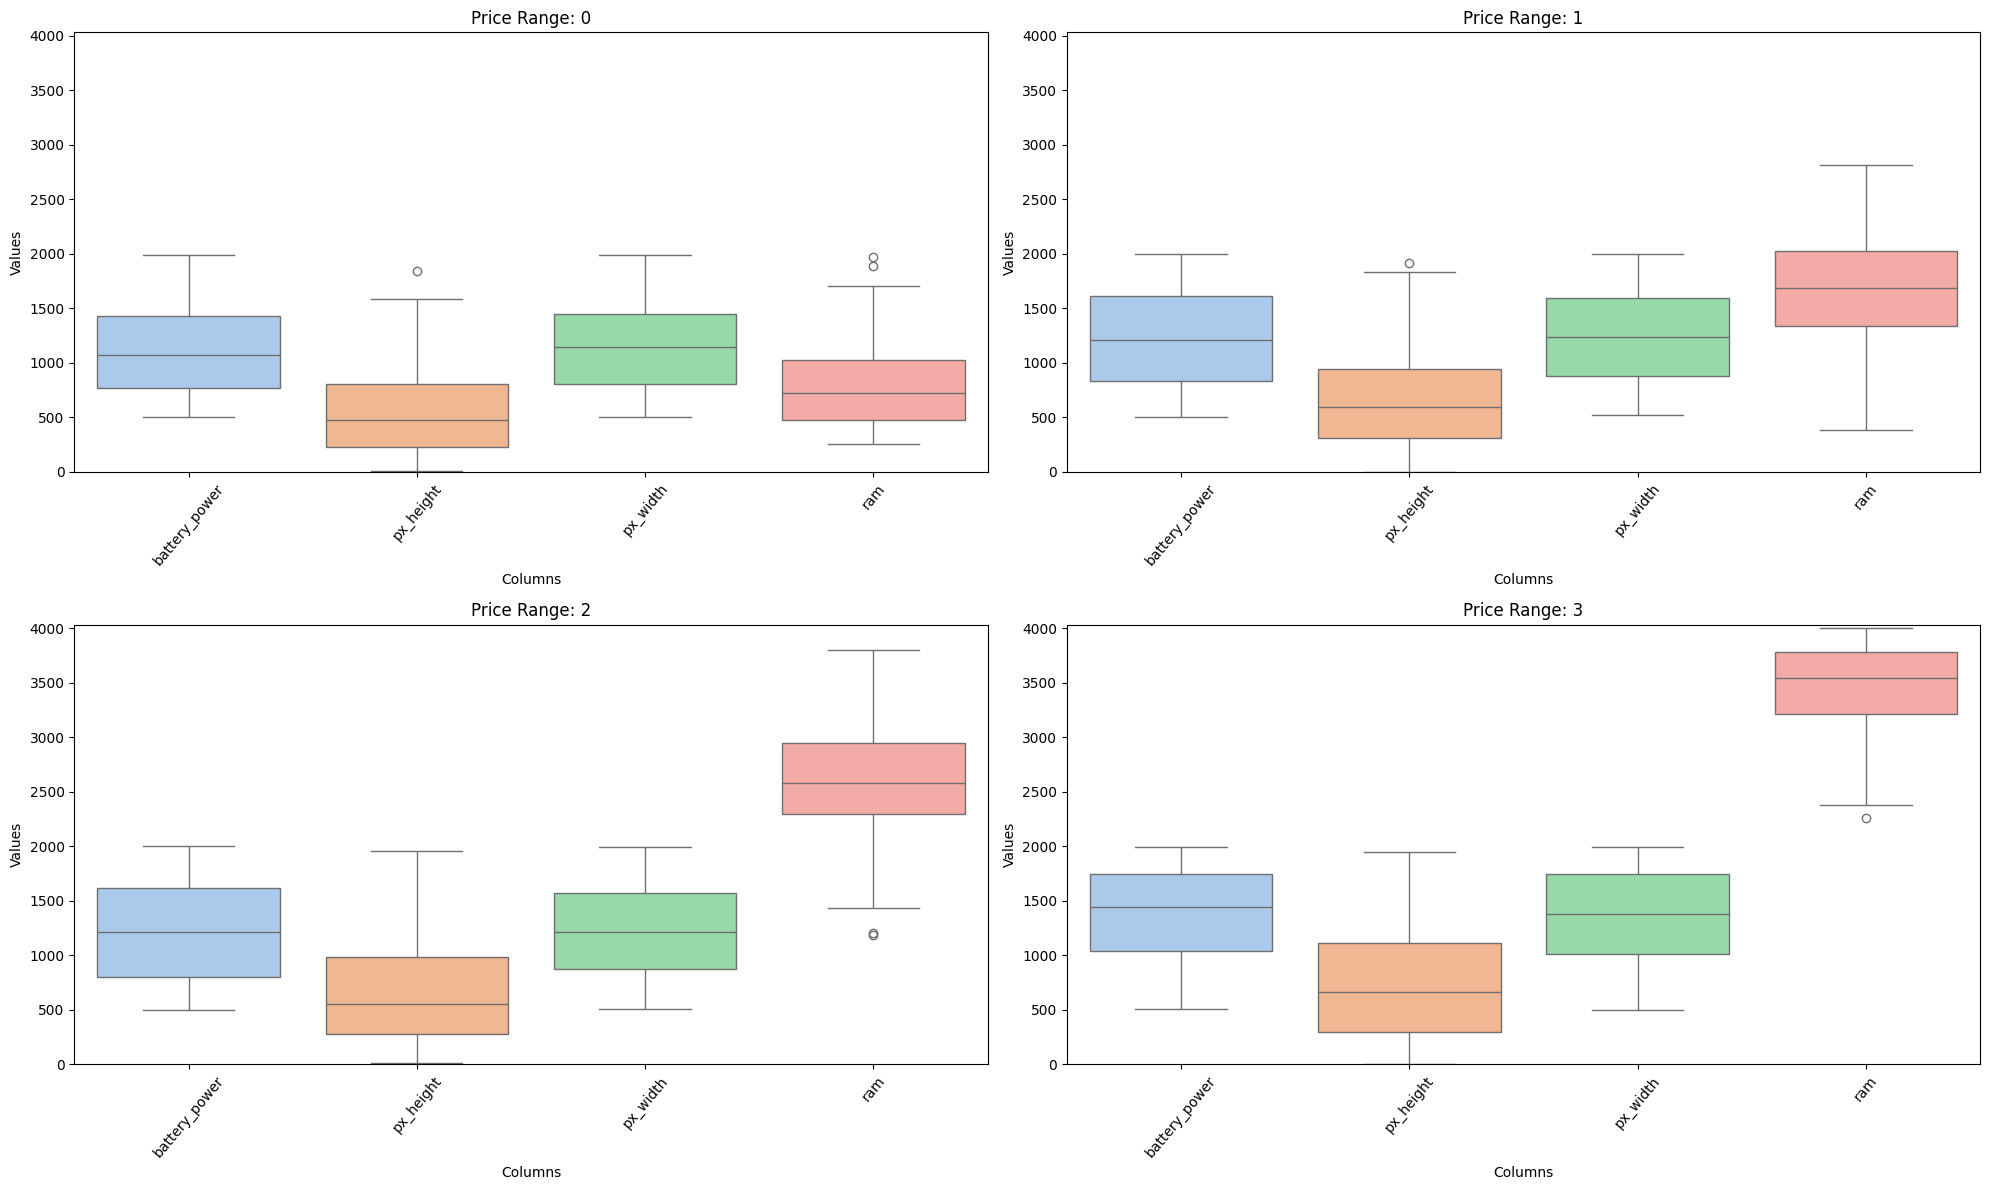

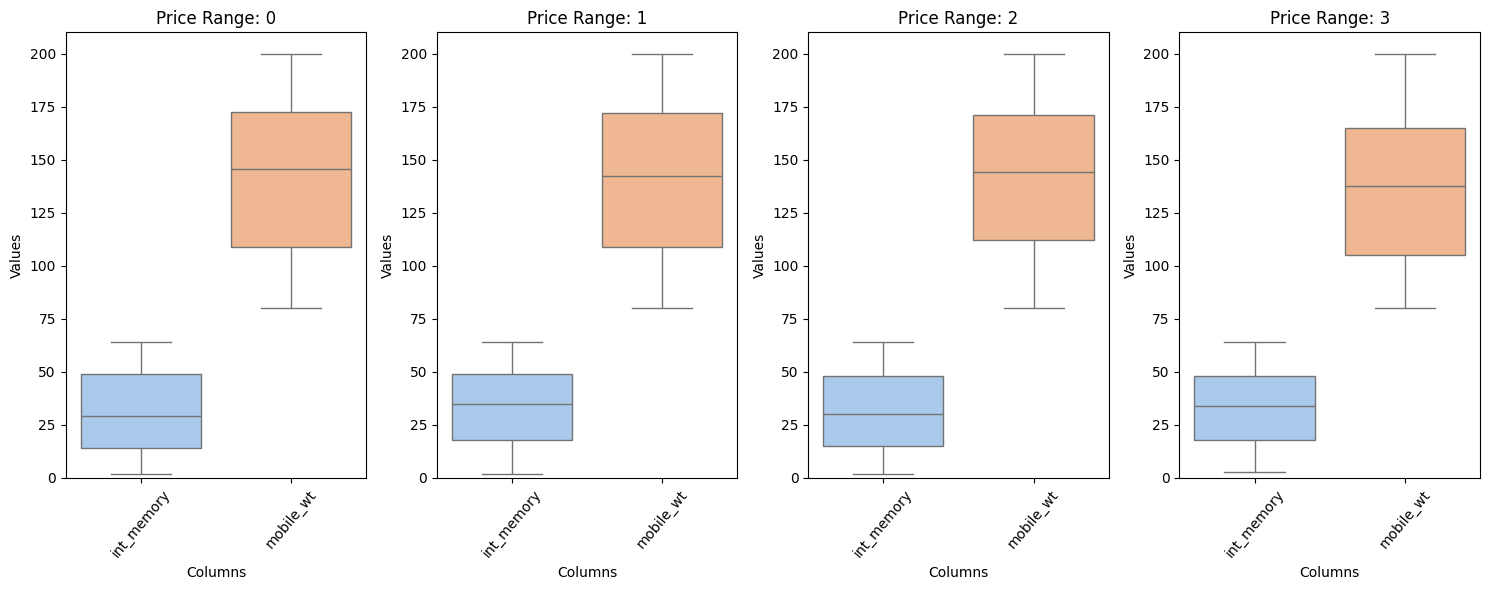

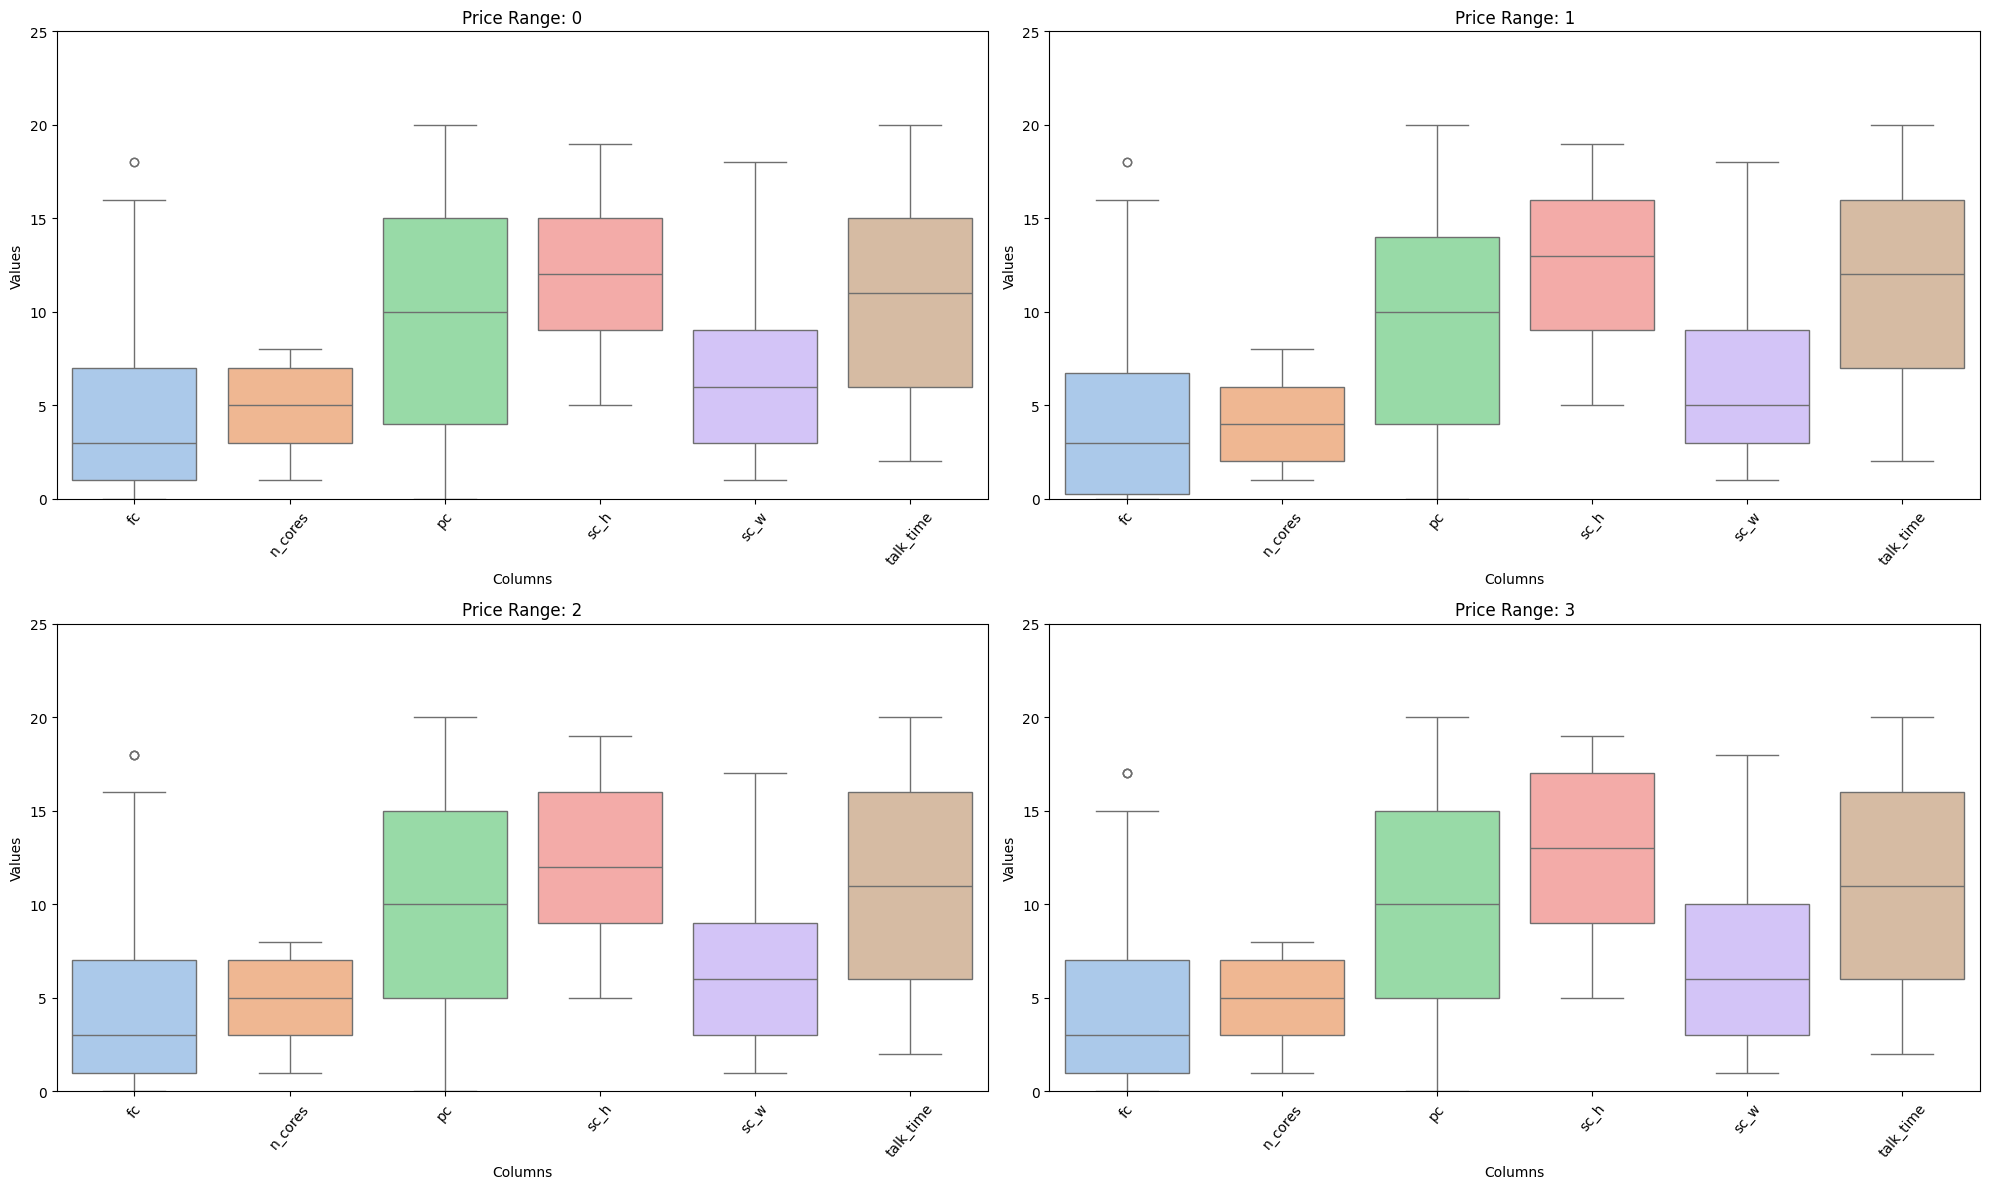

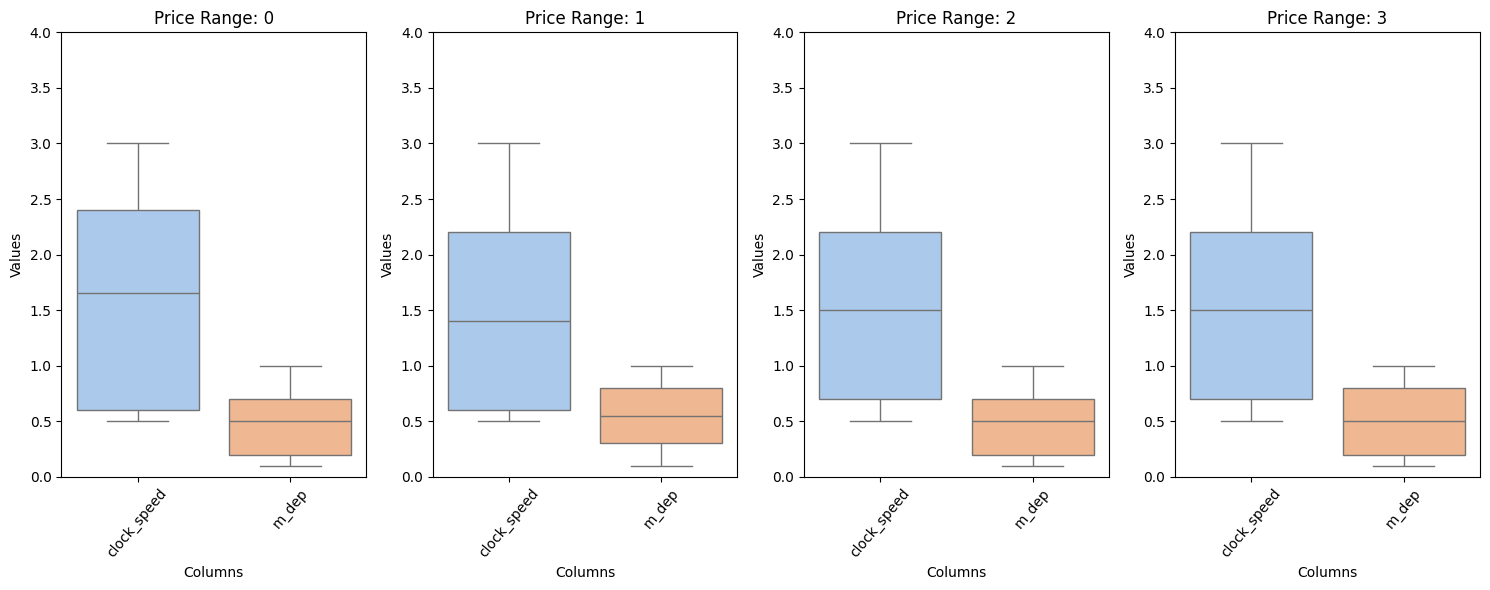

In [9]:
sns.set_palette("pastel")
price_ranges = [0, 1, 2, 3]
excluded_columns = [col for col in mobile_df.columns if mobile_df[col].max() <= 200 and col != 'price_range']
filtered_big = mobile_df[[col for col in mobile_df.columns if col not in excluded_columns]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for i, price_range in enumerate(price_ranges):
    row = i // 2
    col = i % 2
    
    filtered_df = filtered_big[filtered_big['price_range'] == price_range]
    filtered_df = filtered_df.drop(columns=['price_range'])
    
    sns.boxplot(data=filtered_df, ax=axes[row, col])
    axes[row, col].set_title(f'Price Range: {price_range}')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xlabel('Columns')
    axes[row, col].set_ylim(0, 4030)
    axes[row, col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

excluded_columns = [col for col in non_binary_df.columns if (non_binary_df[col].max() > 200) or (non_binary_df[col].max() < 50)]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    sns.boxplot(data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].set_ylabel('Values')
    axes[col].set_xlabel('Columns')
    axes[col].set_ylim(0, 210)
    axes[col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

excluded_columns = [col for col in non_binary_df.columns if (non_binary_df[col].max() <= 5) or (non_binary_df[col].max() >= 50)]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for i, price_range in enumerate(price_ranges):
    row = i // 2
    col = i % 2
    
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    sns.boxplot(data=filtered_df, ax=axes[row, col])
    axes[row, col].set_title(f'Price Range: {price_range}')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xlabel('Columns')
    axes[row, col].set_ylim(0, 25)
    axes[row, col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

excluded_columns = [col for col in non_binary_df.columns if non_binary_df[col].max() > 5]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    filtered_df = filtered_df.drop(columns=['price_range'])
    
    sns.boxplot(data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].set_ylabel('Values')
    axes[col].set_xlabel('Columns')
    axes[col].set_ylim(0, 4)
    axes[col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

### Analysing screen area

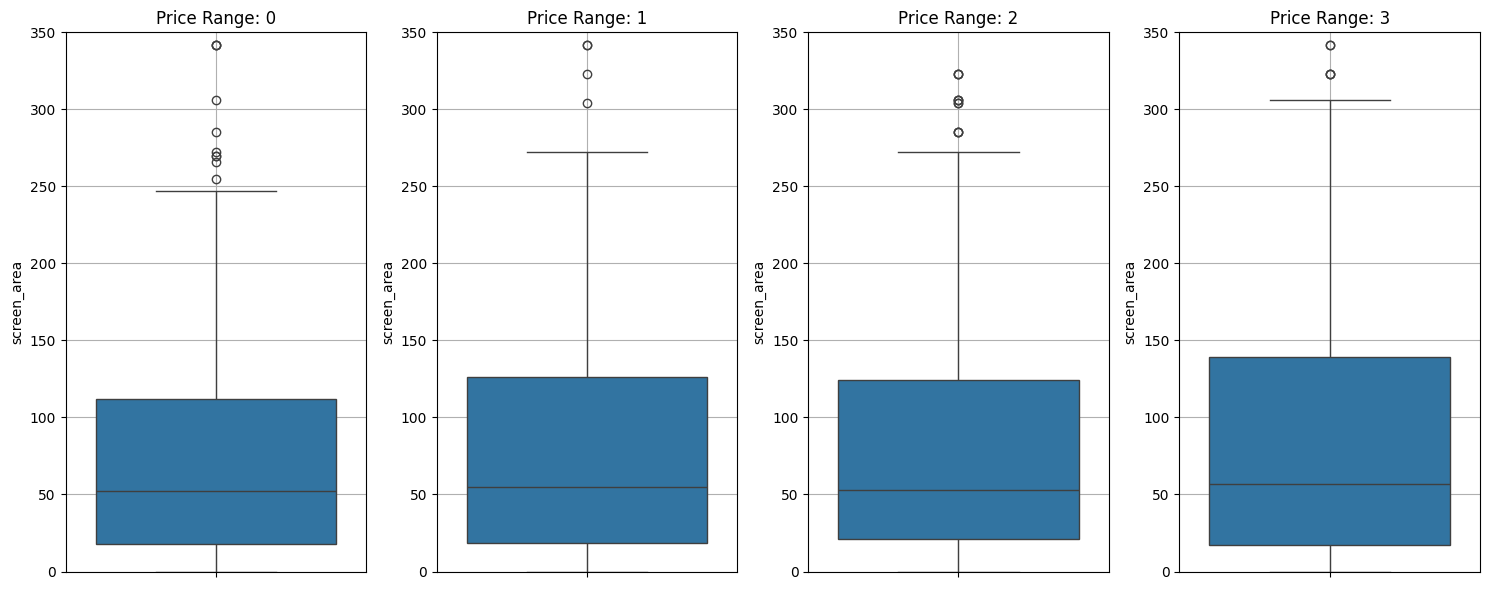

In [10]:
# let's add new column descriging screen area and check if we can see something interesting 
mobile_df['screen_area'] = mobile_df['sc_h'] * mobile_df['sc_w']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
 
    filtered_df = mobile_df[mobile_df['price_range'] == price_range]

    sns.boxplot(y='screen_area', data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].grid(True)
    axes[col].set_ylim(0, 350)
    
plt.tight_layout()
plt.show()


### Same for px_screen from px_height and px_width

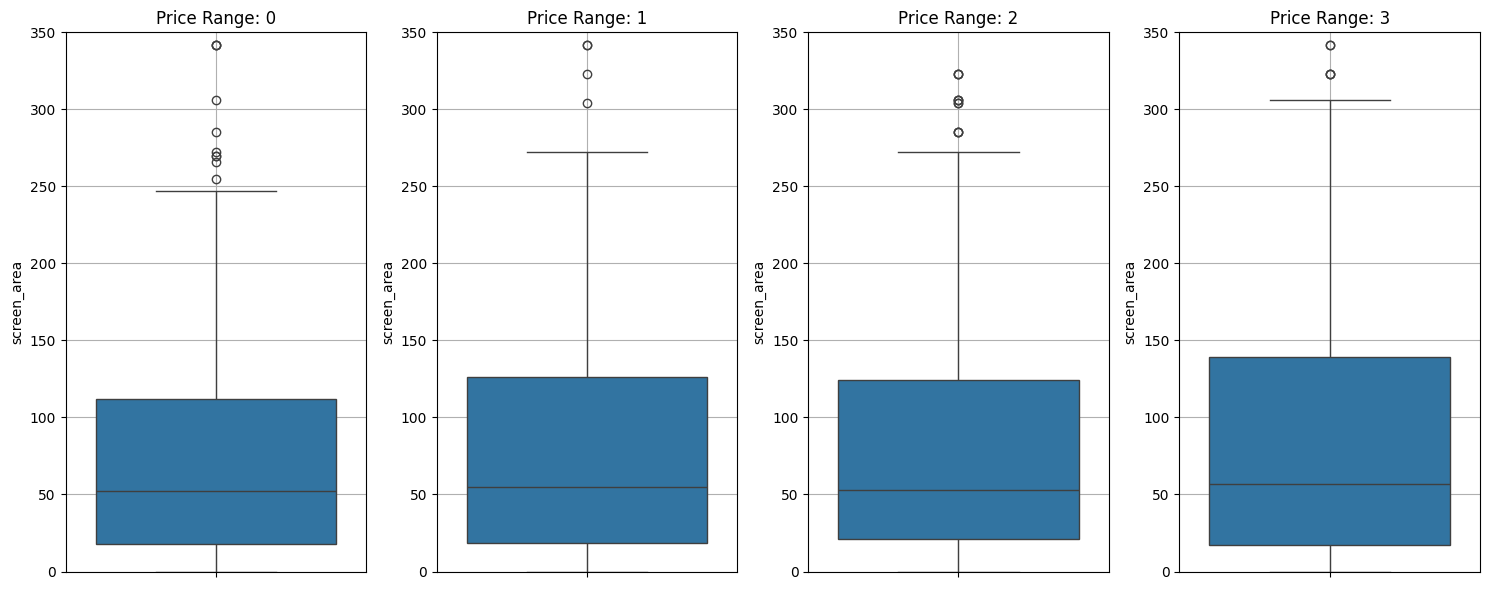

In [11]:
mobile_df['px_screen'] = mobile_df['px_height'] * mobile_df['px_width']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
 
    filtered_df = mobile_df[mobile_df['price_range'] == price_range]

    sns.boxplot(y='screen_area', data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].grid(True)
    axes[col].set_ylim(0, 350)
    
plt.tight_layout()
plt.show()

### Analysing every variable separately

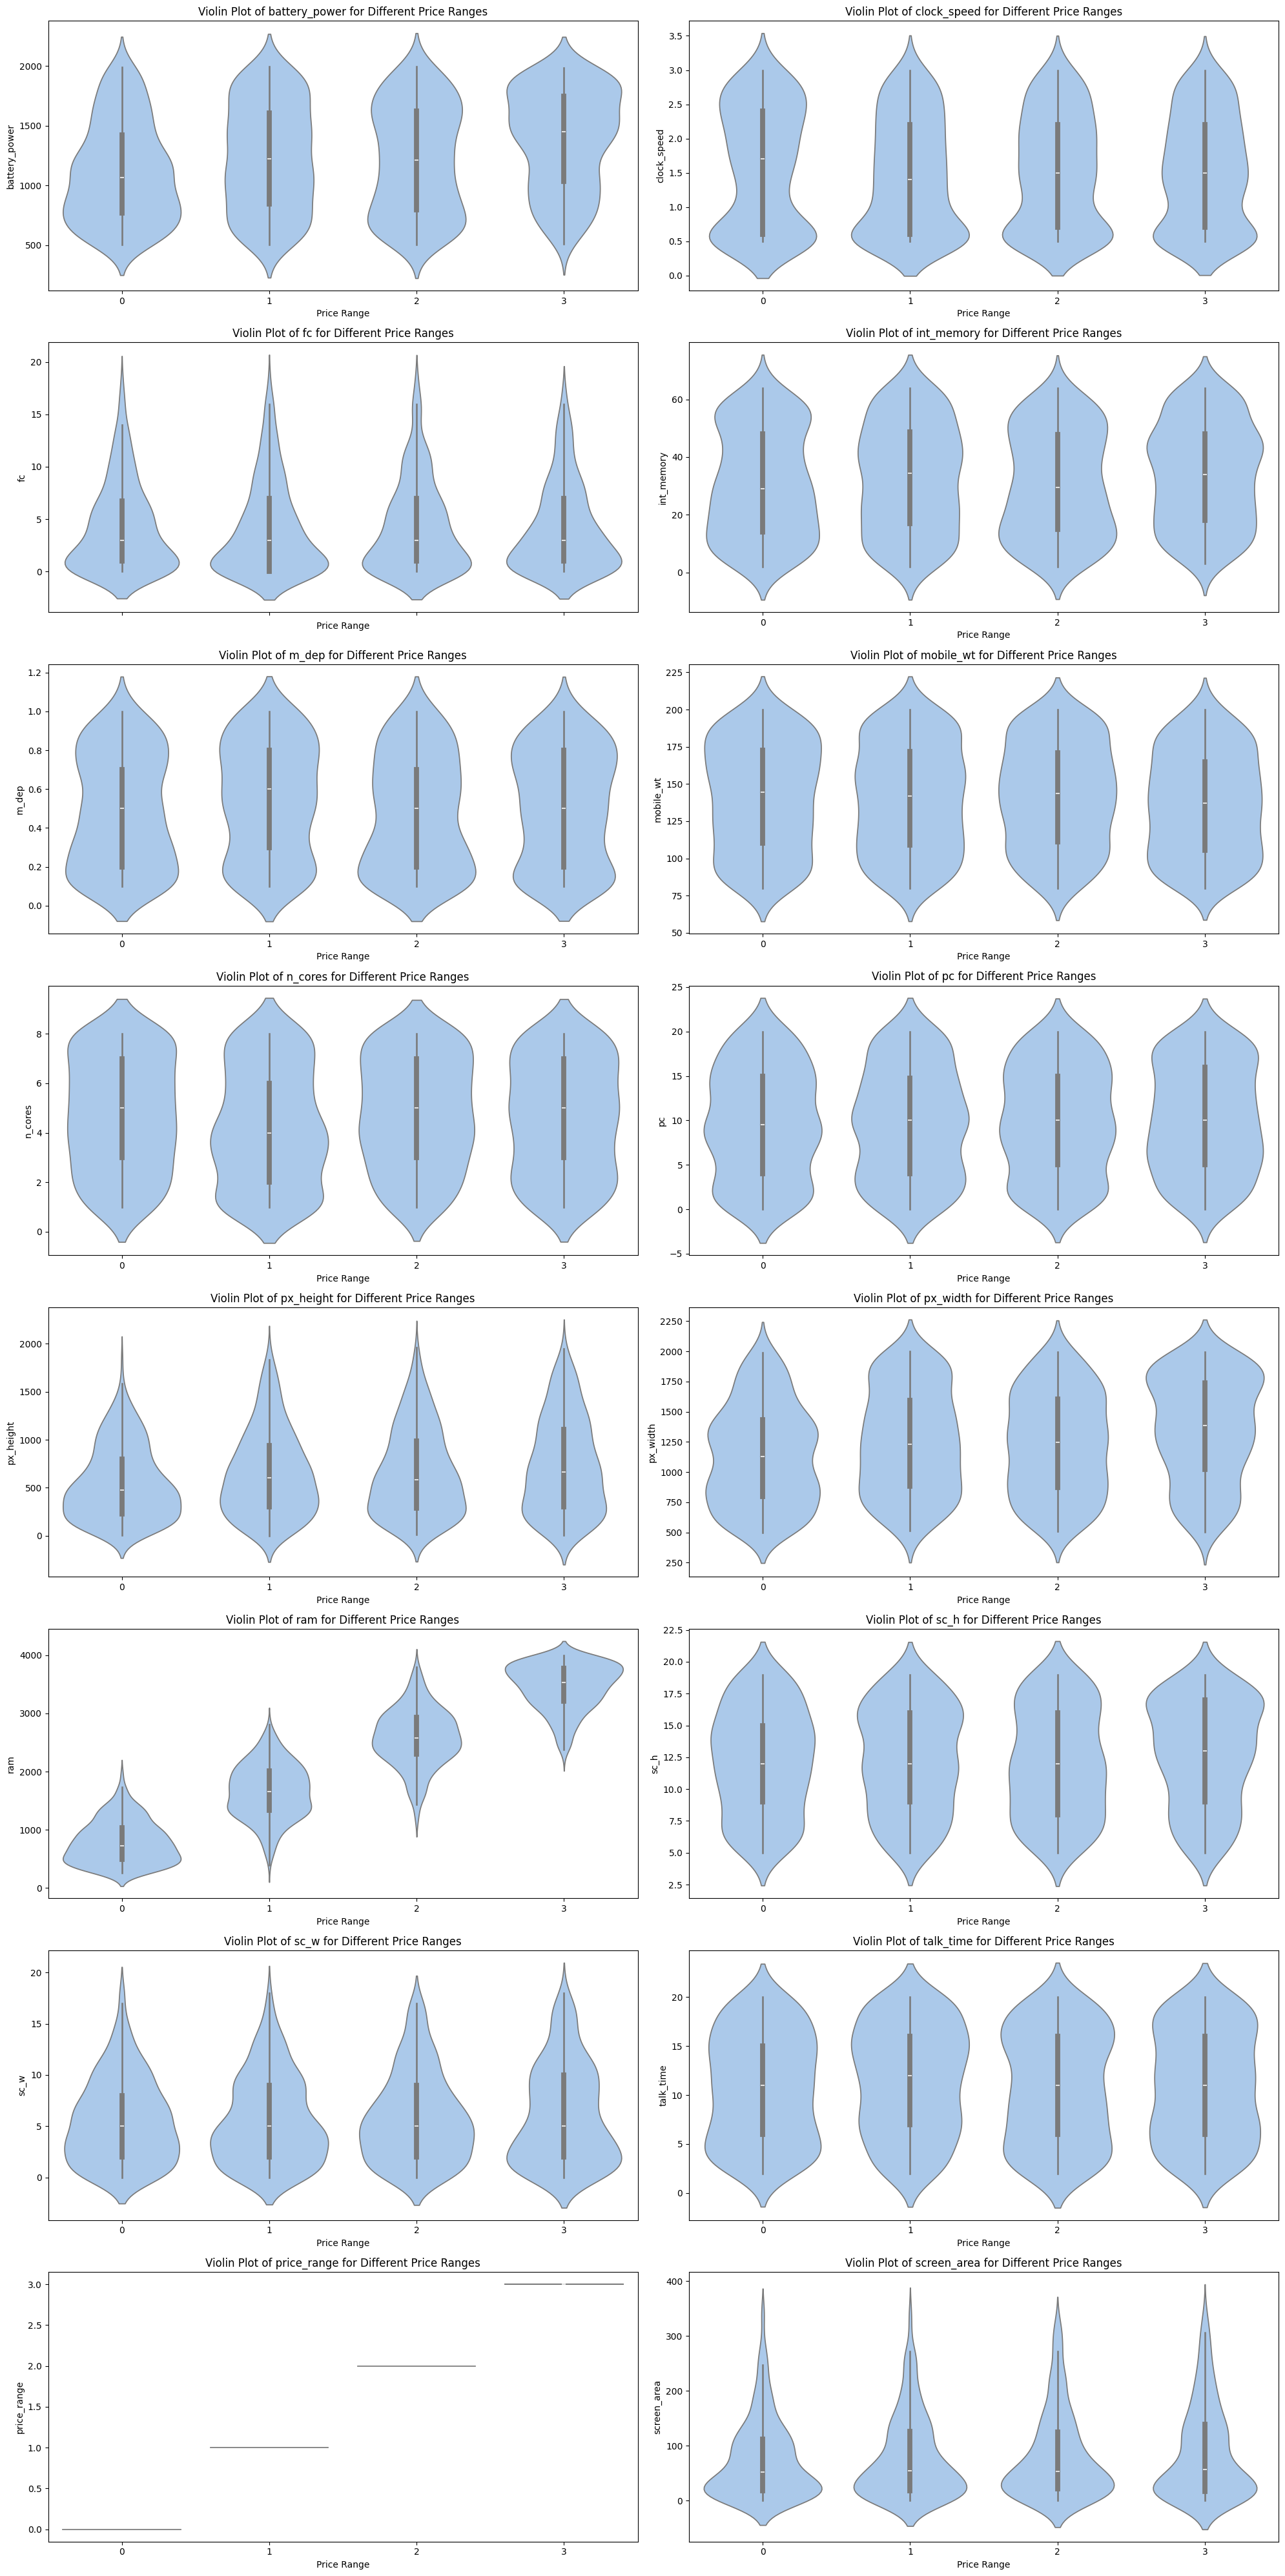

In [15]:
sns.set_palette("pastel")
fig, axes = plt.subplots(8, 2, figsize=(20, 40))

for i, col in enumerate(non_binary_df.columns):
    row = i // 2
    col = i % 2
    sns.violinplot(x='price_range', y=non_binary_df.columns[i], data=non_binary_df, ax=axes[row, col])
    axes[row, col].set_xlabel('Price Range')
    axes[row, col].set_ylabel(non_binary_df.columns[i])
    axes[row, col].set_title(f'Violin Plot of {non_binary_df.columns[i]} for Different Price Ranges')

for ax in axes[1, :-1]:
    ax.set_xticklabels([])

plt.tight_layout()
plt.show()

### Let's look at the correlation matrix

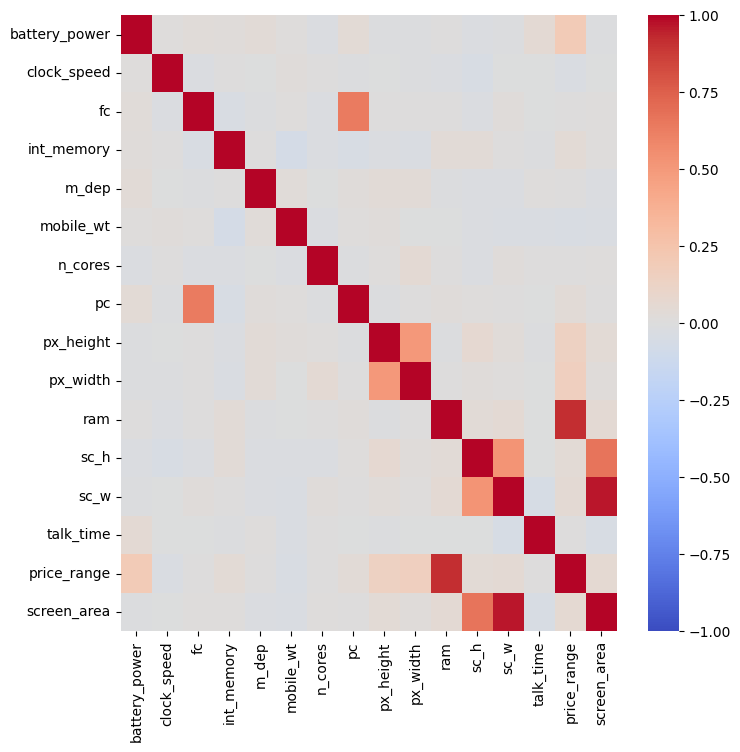

In [9]:
non_binary_df['screen_area'] = non_binary_df['sc_h'] * non_binary_df['sc_w']

corr = non_binary_df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=False, vmin=-1, vmax=1, cmap='coolwarm', fmt=".2f")
plt.show()


In the context of continuous variables, the price_range depends mostly on the *ram* variable, but also on *battery_power,* *px_height*, and *px_width*.

We also observe correlation between some variables, such as:
- *pc* and *fc*
- *px_height* and *px_width*
- *sc_h* and *sc_w*
- *talk_time* and *battery_power*

### Analysing categorical variables

In [52]:
from itertools import product
import itertools
# it is worth noticing that if phone has 4G automatically that means that it has 3G (there is no record where four_g = 1 and three_g = 0 ) !
records_with_both = mobile_df[(mobile_df['four_g'] == 1) & (mobile_df['three_g'] == 0)]
print("Number of records where four_g = 1 i three_g = 0:", len(records_with_both))


Number of records where four_g = 1 i three_g = 0: 0


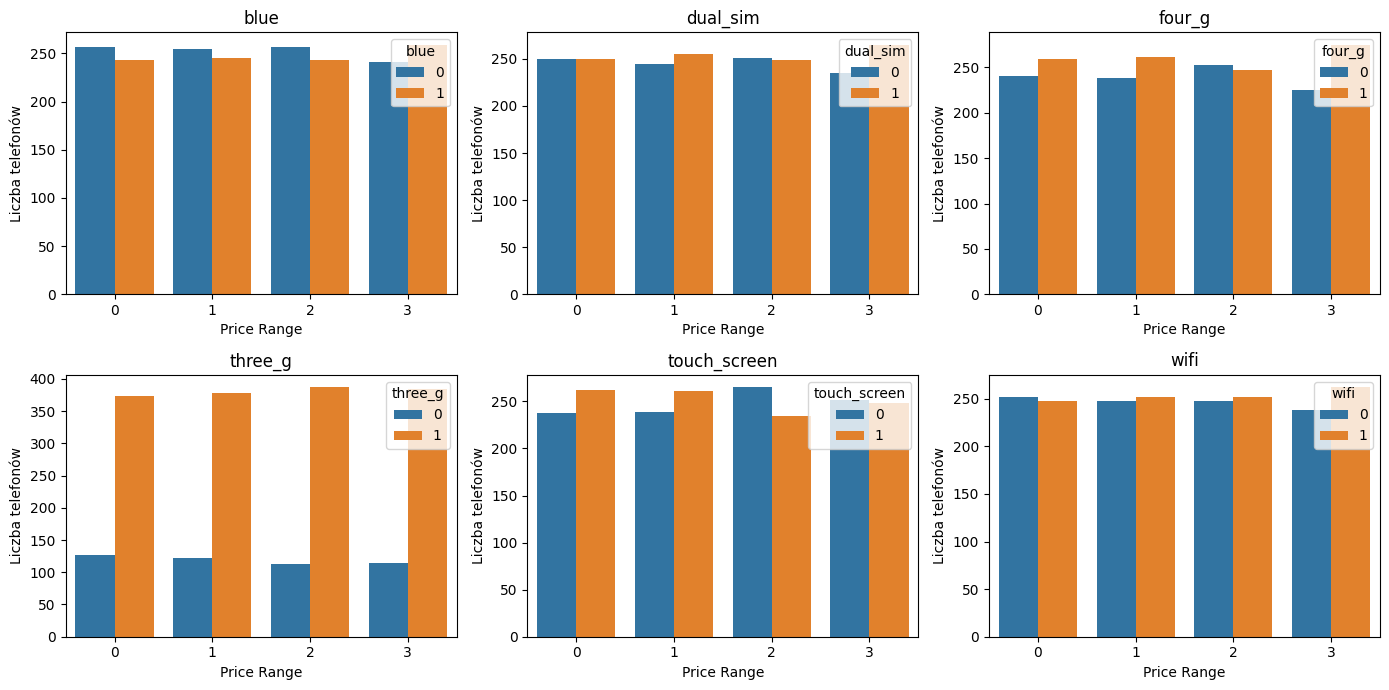

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))

for i in range(2):
    for j in range(3):
        column_index = i * 3 + j
        if column_index < len(columns_binary):
            column = columns_binary[column_index]
            sns.countplot(x='price_range', hue=column, data=mobile_df, ax=axes[i, j])
            axes[i, j].set_title(f'{column}')
            axes[i, j].set_xlabel('Price Range')
            axes[i, j].set_ylabel('Liczba telefonów')
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Looking at categorical variables we can say that for almost all categories number of phones with or without above features is simillar for all price ranges.
Small changes and variations we can observe:
- *bluetooth* - for price range equal 3 we can see some difference; it is the only price range where there are more phones with bluetooth than without it 
- *four_g* - we can say that when it comes to price range equal 3 phones with this 4G feature are most likely to be in that group
- *touch_screen* - kind of surprising but phones with touch screen are more likely to be in price range 0 and 1, while those without it in prince range 2 and 3

Even though we can observe some variations, differences in numbers are pretty small for all features mentioned above.

# 5. Conclusion

Features that we would consider predicting Price Range:
- *ram* - makes the biggest difference
- *battery_power*
- *sc_h* / *sc_w* -> *screen_area*